In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\AKASH\Downloads\archive (6)\gld_price_data.csv")

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [10]:
correlation = data.corr()

In [11]:
plt.figure(figsize = (8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Axes: >

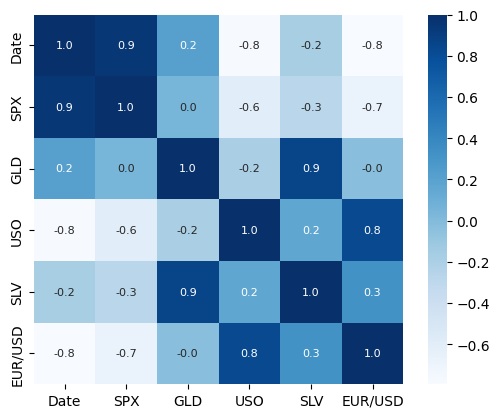

In [12]:
import seaborn as sns
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
corr_data = correlation['GLD'].drop('GLD')
print(corr_data)

Date       0.209118
SPX        0.049345
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


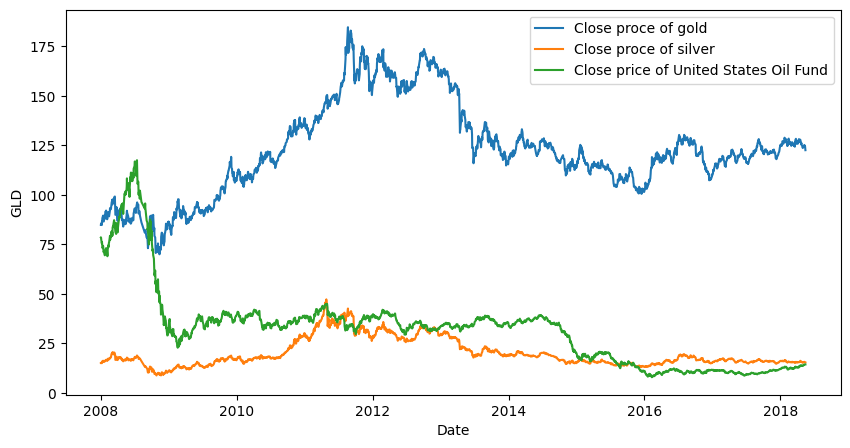

In [14]:
plt.figure(figsize=(10,5))

sns.lineplot(data=data, x = 'Date', y=data['GLD'], label='Close proce of gold')
sns.lineplot(data=data, x = 'Date', y=data['SLV'], label='Close proce of silver')
sns.lineplot(data=data, x = 'Date', y=data['USO'], label='Close price of United States Oil Fund')

plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [16]:
X = data.drop(columns={'Date', 'GLD'}, axis=1)
y = data['GLD']

In [17]:
print(X.shape, y.shape)

(2290, 4) (2290,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=2)

In [19]:
# random_model = RandomForestRegressor()
# random_model = LinearRegression()
random_model = DecisionTreeRegressor()

In [20]:
random_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
train_predicted = random_model.predict(X_train)
test_predicted = random_model.predict(X_test)

In [23]:
import numpy as np

def regression_accuracy(y_true, y_pred, tolerance=0.1):

    errors = np.abs((y_true - y_pred) / y_true)
    
    # Determine which predictions are within the tolerance level
    within_tolerance = errors < tolerance
    
    # Calculate the accuracy as the number of correct predictions divided by the total number of predictions
    accuracy = np.mean(within_tolerance)
    
    return accuracy * 100  # return as a percentage

# Example usage with train and test data
y_train_pred = random_model.predict(X_train)
y_test_pred = random_model.predict(X_test)

train_accuracy = regression_accuracy(y_train, y_train_pred)
test_accuracy = regression_accuracy(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

Train Accuracy: 100.00%
Test Accuracy: 99.07%


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_test_pred)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1.5291995389408097
Mean Squared Error (MSE): 8.296541852205918
Root Mean Squared Error (RMSE): 2.88037182533886
R-squared (R²): 0.9836539560272506


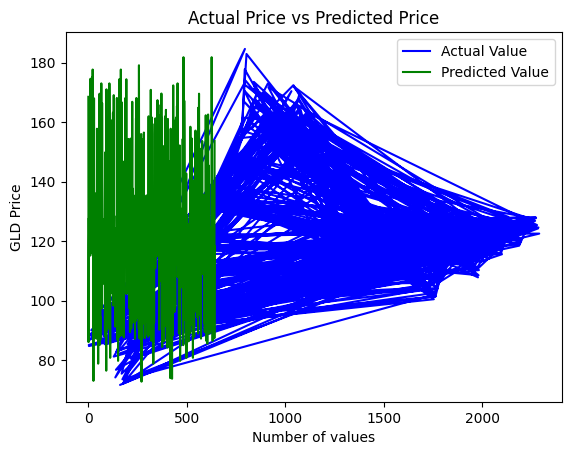

In [25]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_predicted, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [26]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(random_model, file)

print("Model saved successfully!")

Model saved successfully!
